In [3]:
## 導入H2O套件
import h2o

## 導入H2O中的AutoML套件
from h2o.automl import H2OAutoML


## 初始化H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,10 mins 40 secs
H2O_cluster_timezone:,+08:00
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_user_ng09tw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,49.13 Mb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [6]:
## 導入數據集
wine_data = h2o.import_file("data/winequality-white.csv")

## 定義我們的預測變量，也就是自變量x
predictors = wine_data.columns

## 將響應變量(目標值)，也就是應變量y拿掉
predictors.remove('quality')

## 顯示數據集
wine_data

Parse progress: |█████████████████████████████████████████████████████████| 100%


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6


In [7]:
## 將數據集拆成訓練集與測試集，並設置比例為0.7，隨機種子設123456
dataset_split = wine_data.split_frame(ratios = [0.7], seed = 123456)

## 顯示分割結果
print(dataset_split)

## 設定對應的數據集給訓練集與測試集，70%給訓練集，30%給測試集
wine_train = dataset_split[0]
wine_test = dataset_split[1]

## 顯示訓練集與測試集大小
print("Training Set: ", wine_train.shape)
print("Test Set: ", wine_test.shape)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6
8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12,5
8.6,0.23,0.4,4.2,0.035,17,109,0.9947,3.14,0.53,9.7,5
6.6,0.16,0.4,1.5,0.044,48,143,0.9912,3.54,0.52,12.4,7
8.3,0.42,0.62,19.25,0.04,41,172,1.0002,2.98,0.67,9.7,5


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
7.9,0.18,0.37,1.2,0.04,16,75,0.992,3.18,0.63,10.8,5
6.6,0.17,0.38,1.5,0.032,28,112,0.9914,3.25,0.55,11.4,7
6.2,0.66,0.48,1.2,0.029,29,75,0.9892,3.33,0.39,12.8,8
7.4,0.34,0.42,1.1,0.033,17,171,0.9917,3.12,0.53,11.3,6
6.4,0.31,0.38,2.9,0.038,19,102,0.9912,3.17,0.35,11,7
6.8,0.26,0.42,1.7,0.049,41,122,0.993,3.47,0.48,10.5,8


[, ]
Training Set:  (3458, 12)
Test Set:  (1440, 12)


In [10]:
## 導入AutoML套件
from h2o.automl import H2OAutoML

## 設定H2OAutoML
# aml = H2OAutoML(max_models = 10, max_runtime_secs = 200, seed = 1, sort_metric = "deviance")
aml = H2OAutoML(max_models = 10, seed = 1, sort_metric = "deviance")


## 啟動H2OAutoML來訓練模型
aml.train(x = predictors, y = 'quality', training_frame = wine_train, validation_frame = wine_test)

AutoML progress: |███
20:41:34.796: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
20:41:54.341: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████Failed polling AutoML progress log: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'C:\\Users\\user\\AppData\\Local\\Temp\\tmp02n4rb9r.csv'
█Failed polling AutoML progress log: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'C:\\Users\\user\\AppData\\Local\\Temp\\tmp27vvowwa.csv'
█████████████████| 100%


In [11]:
## 印出模型排行榜
lb = aml.leaderboard
print(lb)

## 印出所有行數
# lb.head(rows = lb.nrows)

## 顯示最佳模型資訊
print(aml.leader)

## 顯示最佳模型的詳細資訊
print(aml.leader.metalearner)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210126_204132,0.382426,0.618406,0.382426,0.442062,0.0923409
StackedEnsemble_BestOfFamily_AutoML_20210126_204132,0.382523,0.618484,0.382523,0.441922,0.0923494
DRF_1_AutoML_20210126_204132,0.388463,0.623268,0.388463,0.448745,0.0932731
XRT_1_AutoML_20210126_204132,0.394329,0.627956,0.394329,0.454751,0.0938197
GBM_3_AutoML_20210126_204132,0.418321,0.646777,0.418321,0.48986,0.0961511
GBM_4_AutoML_20210126_204132,0.421024,0.648864,0.421024,0.485337,0.0965026
GBM_2_AutoML_20210126_204132,0.43369,0.658551,0.43369,0.501756,0.0978215
GBM_1_AutoML_20210126_204132,0.435691,0.660069,0.435691,0.502205,0.0982135
GBM_5_AutoML_20210126_204132,0.464828,0.681783,0.464828,0.527855,0.101092
GBM_grid__1_AutoML_20210126_204132_model_1,0.469026,0.684855,0.469026,0.532349,0.101349



Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210126_204132

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.05072837643691723
RMSE: 0.22522960825992047
MAE: 0.1637152360236176
RMSLE: 0.03397513246536877
R^2: 0.9350003955564151
Mean Residual Deviance: 0.05072837643691723
Null degrees of freedom: 3457
Residual degrees of freedom: 3453
Null deviance: 2698.766049739733
Residual deviance: 175.41872571885978
AIC: -483.8521831319914

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.3874135340456473
RMSE: 0.6224255248988808
MAE: 0.4493881422289549
RMSLE: 0.09422669883741058
R^2: 0.5115849343794721
Mean Residual Deviance: 0.3874135340456473
Null degrees of freedom: 1439
Residual degrees of freedom: 1435
Null deviance: 1142.2269775519906
Residual deviance: 557.8754890257321
AIC: 2733.0448416598815

ModelMetricsRegressionGLM: stack

C:\Users\user\anaconda3\lib\site-packages\h2o\estimators\stackedensemble.py:821: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


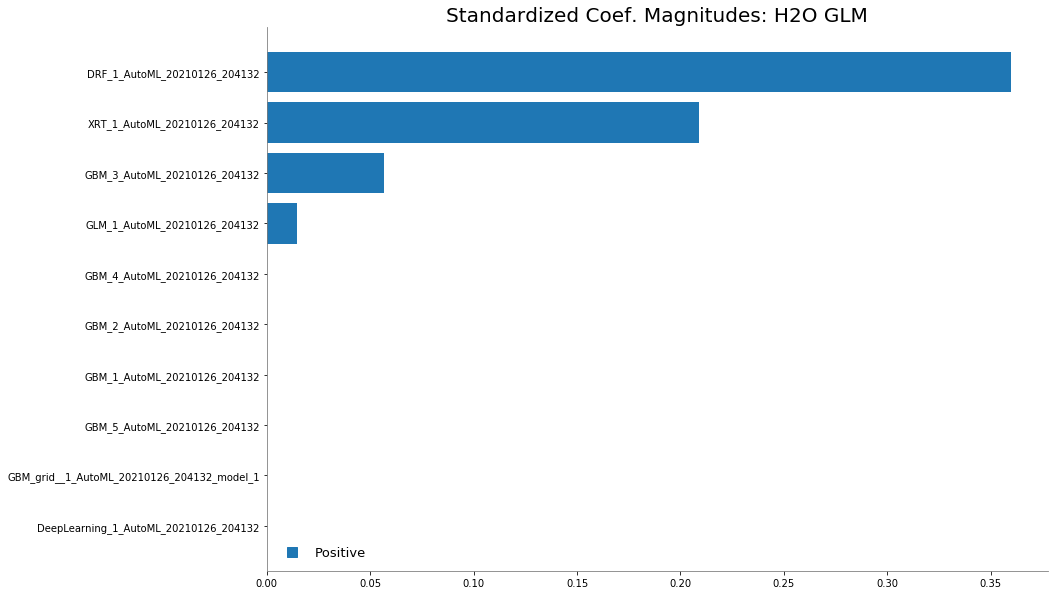

In [12]:
## 取得最佳模型的model_id，也就是模型資料中的 Model Key
metalearner = h2o.get_model(aml.leader.metalearner()['name'])

## 視覺化: 最佳模型底下的各種演算法模型的標準化係數比較
metalearner.std_coef_plot()

In [13]:
## 拿最佳模型預測測試集資料
preds = aml.leader.predict(wine_test)
print(preds)

## 評估最佳模型的性能表現
score = aml.leader.model_performance(wine_test)
print(score)

## 關閉H2O
h2o.shutdown()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
5.83077
5.1373
5.80043
5.62884
6.04504
6.47445
7.09154
5.70645
6.16501
6.53739




ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.3874135340456473
RMSE: 0.6224255248988808
MAE: 0.4493881422289549
RMSLE: 0.09422669883741058
R^2: 0.5115849343794721
Mean Residual Deviance: 0.3874135340456473
Null degrees of freedom: 1439
Residual degrees of freedom: 1435
Null deviance: 1142.2269775519906
Residual deviance: 557.8754890257321
AIC: 2733.0448416598815



C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:10: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  # Remove the CWD from sys.path while we load stuff.


H2O session _sid_9cd0 closed.
